# Mining Software Repositories Assignment 2 (MSR2)

Most research questions that require software repository data cannot be answered with a simple API query, which is where quantitative analysis techniques for data wrangling take over. Please continue to use the `miner-utils` Python library ([link](https://github.com/EPICLab/miner-utils)), and answer the following questions using Python code in the empty code boxes below.

This assignment is most easily accomplished using the [`pandas`](https://pandas.pydata.org/) library. We have included the following resources on Canvas to assist you:
* [Tutorial: Data Wrangling with Pandas](https://canvas.oregonstate.edu/courses/1793778/pages/tutorial-data-wrangling-with-pandas)
* [Data Wrangling with pandas Cheat Sheet](https://canvas.oregonstate.edu/courses/1793778/files/81752460/download?wrap=1)

Similar to the tutorials and in-class demonstration, you will want to provide authenticate to the GitHub API in order to have a higher rate-limit. ***NOTE***: Again, please do not include your authentication username or token in your submission.

In [ ]:
# install any missing dependencies (only needed if you haven't installed these already during tutorials)
!pip install "git+https://github.com/EPICLab/miner-utils"
!pip install 'gitpython'
!pip install 'pandas'
!pip install 'numpy'
!pip install 'matplotlib'
!pip install 'stop-words'

In [3]:
userName = 'USER'
token = 'TOKEN'

In [353]:
# setup environment (import any needed dependencies)
from minerutils import GitHub
import pandas as pd
import numpy as np
import datetime
import re
from stop_words import get_stop_words
import matplotlib
import statistics
from scipy.stats import shapiro, spearmanr
from sklearn import datasets, linear_model
from os import path
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')

# create github obj
gh = GitHub(userName, token)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rupika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rupika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [201]:
# opens the json file if it exists
def open_file(file_name):
    file = path.exists(file_name)
    json_data = None
    if file:
        with open(file_name, "r", encoding="utf8") as f:
           json_data = json.loads(f.read())
        return True, json_data
    else:
        return False, json_data

# create new json file if it doesn't exist
def create_file(data, file_name):   
    # write to json from api call data
    with open(file_name, "w+") as f:
        f.write(json.dumps(data))    
        gh.writeData(file_name, data)

    # read data from pulls.json
    return gh.readData(file_name)    
   
# handling issue data
i_check, issues = open_file("bit_issues.json")
if not i_check:
    issues = gh.get('/repos/bitcoin/bitcoin/issues', params={"state": 'all'})
    issues = create_file(issues, "bit_issues.json")
print("issue check complete")

issue check complete


In [291]:
# remove the PR from issues

# put issues in a df
all_issues = pd.DataFrame(issues)

# take all the rows where 'pull_request' is null to get only issues
all_issues = all_issues[all_issues['pull_request'].isnull()]

# reset the index
all_issues.reset_index(drop=True, inplace=True)

# drop PR column
all_issues = all_issues.drop(columns=['pull_request'])

# all_issues

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app
0,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/20270,733031470,MDU6SXNzdWU3MzMwMzE0NzA=,20270,"Intermittent ""JSONRPCException: Transaction no...",...,[],None,2,2020-10-30T09:45:27Z,2020-10-30T10:18:05Z,None,MEMBER,None,https://travis-ci.org/github/bitcoin/bitcoin/j...,None
1,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/20269,733016787,MDU6SXNzdWU3MzMwMTY3ODc=,20269,Log timestamp inconsistency,...,[],None,1,2020-10-30T09:23:21Z,2020-10-30T10:23:55Z,2020-10-30T10:23:55Z,MEMBER,None,Having a system on Armbian Focal 20.08:\r\n```...,None
2,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/20261,732070529,MDU6SXNzdWU3MzIwNzA1Mjk=,20261,.,...,[],None,1,2020-10-29T07:19:52Z,2020-10-29T07:24:13Z,2020-10-29T07:23:20Z,NONE,off-topic,Is there a future plan to make the fees lower ...,None
3,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/20259,731672474,MDU6SXNzdWU3MzE2NzI0NzQ=,20259,Unable to compile on native macOS after 3caee1...,...,[],None,3,2020-10-28T18:03:25Z,2020-10-28T18:12:08Z,2020-10-28T18:12:00Z,CONTRIBUTOR,None,Introduced with 3caee16946575e71e90ead9ac531f5...,None
4,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/20252,730231286,MDU6SXNzdWU3MzAyMzEyODY=,20252,Update Automated Testing part: Travis CI syste...,...,[],None,0,2020-10-27T08:30:40Z,2020-10-27T08:31:17Z,None,NONE,None,Travis CI system has been mentioned in the rea...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/5,483128,MDU6SXNzdWU0ODMxMjg=,5,Make the version number the protocol version a...,...,[],None,10,2010-12-19T20:06:45Z,2019-12-29T22:31:59Z,2011-02-13T09:22:02Z,CONTRIBUTOR,None,As there is a String field (SubVersionNum) I t...,None
5770,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin/i...,https://github.com/bitcoin/bitcoin/issues/4,482909,MDU6SXNzdWU0ODI5MDk=,4,"Export/Import wallet in a human readable, futu...",...,[],None,3,2010-12-19T16:28:57Z,2019-12-29T16:16:30Z,2010-12-21T03:01:29Z,NONE,None,,None
5771,https://api.github.com/repos/bitcoin/bitcoin/i...,https://api.github.com/repos/bitcoin/bitcoin,https://api.github.com/repos/bitcoin/bitc

## Part 1: `bitcoin/bitcoin` project

For this assignment, we will investigate the [bitcoin/bitcoin](https://github.com/bitcoin/bitcoin) project.

#### Question 1:
Using a barchart plot to illustrate your answer, show which day of the week receives the most new issues.

(***Note***: GitHub's REST API v3 considers every pull request an issue, but not every issue is a pull request. For this reason, the _"Issues"_ endpoint may return both issues and pull requests in the response. You can identify pull requests by the `pull_request` key. This information is pulled directly from the [GitHub API documentation](https://docs.github.com/en/free-pro-team@latest/rest/reference/issues#list-repository-issues).)

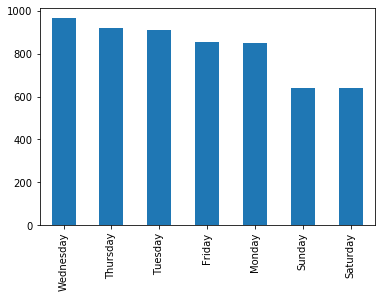

In [372]:
# copy necessary columns into new df
time_col = all_issues[['number', 'created_at']]
time = time_col.copy()

# converting timestamp string to dt object
time.iloc[: ,1] = pd.to_datetime(time['created_at'], format='%Y-%m-%dT%H:%M:%SZ')

# getting the day of week
time['day'] = ''
time.iloc[:,2] = time['created_at'].dt.strftime('%A')

# plotting counts per day
time['day'].value_counts().plot(kind='bar')

#### Question 2:
Using the issues that you collected in Question 1, determine the descriptive statistics for:
* word counts in the issue text
* number of comments
* word counts of comments

Recall that descriptive statistics refers to _mean_, _median_, _mode_, _standard deviation_, and _variance_.

This type of natural language processing often requires the removal of [stop words](https://en.wikipedia.org/wiki/Stop_word) so that meaningful words can surface, therefore, please exclude all of the most common English words provided by the [`stop-words`](https://pypi.org/project/stop-words/) library before calculating your descriptive statistics.

In [380]:
# copy necessary columns into new df
com_col = all_issues[['number','comments', 'comments_url','body']]
comment = com_col.copy()
comment.columns = ['issue_number', 'comment_count', 'comment_url', 'issue_body']

# get descriptive stats for number of comments
comment['comment_count'].describe() # mean and std
comment['comment_count'].median()
comment['comment_count'].var()
comment['comment_count'].mode()[0]

# word count in the issue text
comment['issue_wc'] = ''
# comment

In [381]:
# get stop_words list
stop_words = stopwords.words('english')

# get the wc after removing stop words + punctuation
def get_word_count(word, stop_words):
    # strip punctuation from string
    word = re.sub(r'[^\w\s]', '', word) 
    
    # split word into substrings
    substr = word_tokenize(word)
    
    # remove stop words and copy into new string
    fil = [w for w in substr if not w in stop_words]
    return len(fil)

# get the issue body wc for each row
for i, row in comment.iterrows():
    word = comment.loc[i, 'issue_body'].lower()
    comment.iloc[i,4] = get_word_count(word,stop_words)

In [390]:
# get descriptive stats for issue word count
# comment['issue_wc'].describe() # mean and std
comment['issue_wc'].mean() 
comment['issue_wc'].std() 
comment['issue_wc'].median()
comment['issue_wc'].var()
comment['issue_wc'].mode()[0]

comment['comment_wc'] = ''
# comment

20

In [391]:
# get the word counts of comments
for i, row in comment.iterrows():
    # fetch issue to get comments from
    issue_com = "/repos/bitcoin/bitcoin/issues/{}/comments?per_page=100".format(row['issue_number'])
    repo = gh.get(issue_com)
    # if issue has comments
    if repo:
        # if there's only one comment
        if len(repo) == 1:
            text = repo[0]['body'].lower()
            # append to comment_wc in df
            comment.iloc[i,5] = get_word_count(text,stop_words)
        else:
            text = ''
            # append all comments together to pass into wc func
            for ind, r in enumerate(repo):
                text += repo[ind]['body'].lower()
            comment.iloc[i,5] = get_word_count(text,stop_words)
    # checking progress
    if i % 500 == 0:
        print('now on row:', i)

now on row: 0
now on row: 500
now on row: 1000
now on row: 1500
now on row: 2000
now on row: 2500
now on row: 3000
now on row: 3500
now on row: 4000
now on row: 4500
[2020-10-31 04:22:50.845479]: Exhausted the API Rate Limit. Sleeping for 1143.1545207500458
[2020-10-31 04:41:55.130878]: Resuming...
now on row: 5000
now on row: 5500


In [396]:
# removing all empty rows from comment_wc
t = comment['comment_wc']
wc = t.copy()

# remove all the empty rows
wc.replace('',np.nan,inplace=True)
wc.dropna(inplace=True)
wc.reset_index()

# get descriptive stats for comment word count
wc.describe() # mean and std
wc.median()
wc.var()
wc.mode()[0]

2.0

#### Question 3
Now create three plots to illustrate the descriptive statistics you found in Question 2.

In [416]:
# function taken from in-class practicum to exclude outliers
def excludeOutliers(df: pd.DataFrame, col: str) -> pd.DataFrame:
    return df[np.abs(df[col] - df[col].mean()) <= (3.29 * df[col].std())]

data_copy = comment.copy(deep=True)

# dropping data that's an outlier
data_copy = excludeOutliers(data_copy, 'comment_count')
data_copy = excludeOutliers(data_copy, 'issue_wc')

data_copy['comment_wc'].replace('',0,inplace=True)
data_copy = excludeOutliers(data_copy, 'comment_wc')

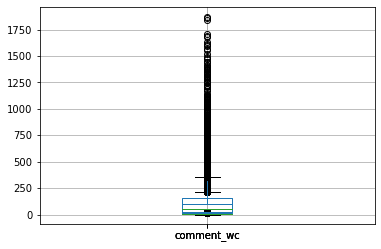

In [417]:
# number of comments per issue
data_copy.boxplot(column='comment_count')

# word counts in the issue body 
#(weird manipulation bc regular boxplot wasn't working)
w = data_copy['issue_wc']
iwc = w.copy()
iwc.plot.box()

# word counts of comments 
# wc.plot.box()
data_copy.boxplot(column='comment_wc')


#### Question 4:
Does the number of comments or the word count in comments impact the duration that the issue remained open? (Issues that have not been closed should be excluded from your statistical analysis.)

In [362]:
# create new df with required col
closed = all_issues[['number', 'state', 'created_at', 'updated_at', 'closed_at']]
close_issue = closed.copy()
close_issue.insert(5, 'issue_wc', comment['issue_wc'])
close_issue.insert(6, 'comment_wc', comment['comment_wc'])

# drop all open issues from df
close_issue.drop(close_issue[close_issue['state'] == 'open'].index, inplace = True)
close_issue.reset_index(drop=True, inplace=True) 

# replace empty strings with 0
close_issue['issue_wc'].replace('',0,inplace=True)
close_issue['comment_wc'].replace('',0,inplace=True)

# converting string to dt object
close_issue.iloc[: ,2] = pd.to_datetime(close_issue['created_at'], format='%Y-%m-%dT%H:%M:%SZ')
close_issue.iloc[: ,4] = pd.to_datetime(close_issue['closed_at'], format='%Y-%m-%dT%H:%M:%SZ')

# getting the gap
close_issue['gap'] = ''
create = close_issue.iloc[: ,2]
done = close_issue.iloc[: ,4]

# get the duration (in hours)
close_issue.iloc[:,-1] = done-create
close_issue['duration'] = (close_issue['gap'].dt.total_seconds())/3600

# close_issue

c:\users\rupika\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Normality Test ISSUE WC: statistics=0.391, p=0.0
Shapiro-Wilk Normality Test COMMENT WC: statistics=0.396, p=0.0

Spearman`s Rank Correlation Coefficient ISSUE WC: correlation=0.062, p=8.246909400257383e-06
Spearman`s Rank Correlation Coefficient COMMENT WC: correlation=0.321, p=4.575591756135584e-125


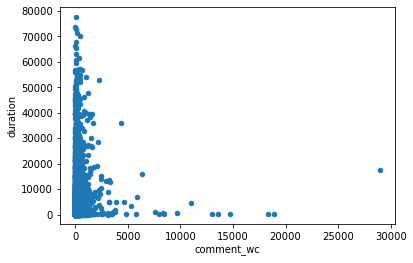

In [373]:
# check for normality first using Shapiro test

# issue body word count
stat, p = shapiro(close_issue[["issue_wc", 'duration']])
shap = 'Shapiro-Wilk Normality Test ISSUE WC: statistics={}, p={}'.format(round(stat, 3), p)
print(shap)

# comment word count 
s, pp = shapiro(close_issue[["comment_wc", 'duration']])
sha = 'Shapiro-Wilk Normality Test COMMENT WC: statistics={}, p={}'.format(round(s, 3), pp)
print(sha)

# performing straight line test to determine if we can use
# Pearson's test (it fails)
# close_issue.plot(x='issue_wc', y='duration', kind='scatter')
close_issue.plot(x='comment_wc', y='duration', kind='scatter')

# run spearman's rank - issue body word count
corr, p_val = spearmanr(close_issue[["issue_wc", 'duration']])
spear = '\nSpearman`s Rank Correlation Coefficient ISSUE WC: correlation={}, p={}'.format(round(corr, 3), p_val)
print(spear)

# comment word count
com_corr, com_p_val = spearmanr(close_issue[["comment_wc", 'duration']])
spearman = 'Spearman`s Rank Correlation Coefficient COMMENT WC: correlation={}, p={}'.format(round(com_corr, 3), com_p_val)
print(spearman)
